In [4]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import matplotlib.cm as cm
import copy
import scipy.cluster.hierarchy as sch
from scipy.spatial.distance import squareform

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
mpl.rcParams['axes.linewidth'] = 0.3

In [2]:
MitoCarta3_file = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/MITOCARTA3.0/Mouse.MitoCarta3.0.xls'
MitoCarta = pd.read_excel(MitoCarta3_file, 'A Mouse MitoCarta3.0')
MitoPW    = pd.read_excel(MitoCarta3_file, 'C MitoPathways')

name2EnsgID = MitoCarta[['Symbol','EnsemblGeneID']].set_index('Symbol')['EnsemblGeneID'].to_dict()
name2UniprotID = MitoCarta[['Symbol','UniProt']].set_index('Symbol')['UniProt'].to_dict()

MitoPW['PW level'] = MitoPW['MitoPathway Hierarchy'].str.split('>').str.len()
MitoPW['EnsemblGeneIDs'] = ''
for i in range(len(MitoPW)):

    # Collecting Ensembl gene IDs
    for gene in MitoPW.iloc[i,:]['Genes'].split(', '):
        if type(name2EnsgID[gene]) == float : continue
        MitoPW.iloc[i,4] += name2EnsgID[gene].replace('|',',') + ','
    MitoPW.iloc[i,4] = MitoPW.iloc[i,4][:-1]

MitoPW = MitoPW.set_index('MitoPathway',drop=True)

display(MitoPW)


Ensembl_Genesets = {
    # 'OXPHOS subunits' : pd.DataFrame({'gene_id' : MitoPW.loc['OXPHOS subunits','EnsemblGeneIDs'].split(',')}),
    # 'TCA cycle' : pd.DataFrame({'gene_id' : MitoPW.loc['TCA cycle','EnsemblGeneIDs'].split(',')}),
    # 'Lipid metabolism' : pd.DataFrame({'gene_id' : MitoPW.loc['Lipid metabolism','EnsemblGeneIDs'].split(',')}),
    # 'Fatty acid oxidation' : pd.DataFrame({'gene_id' : MitoPW.loc['Fatty acid oxidation','EnsemblGeneIDs'].split(',')}),
    'Mitochondrial ribosome' : pd.DataFrame({'gene_id' : MitoPW.loc['Mitochondrial ribosome','EnsemblGeneIDs'].split(',')}),
    # 'All MitoCarta' : MitoCarta[['EnsemblGeneID']].drop_duplicates().rename(columns={'EnsemblGeneID':'gene_id'})
}

,MitoPathway Hierarchy,Genes,PW level,EnsemblGeneIDs
MitoPathway,,,,
Mitochondrial central dogma,Mitochondrial central dogma,"2810006K23Rik, Aars2, Alkbh1, Angel2, Apex1, A...",1,"ENSMUSG00000047635,ENSMUSG00000023938,ENSMUSG0..."
mtDNA maintenance,Mitochondrial central dogma > mtDNA maintenance,"Apex1, Atad3a, Dna2, Endog, Exog, Lig3, Mettl4...",2,"ENSMUSG00000035960,ENSMUSG00000029036,ENSMUSG0..."
mtDNA replication,Mitochondrial central dogma > mtDNA maintenanc...,"Dna2, Exog, Lig3, Mgme1, Polg, Polg2, Polrmt, ...",3,"ENSMUSG00000036875,ENSMUSG00000042787,ENSMUSG0..."
mtDNA nucleoid,Mitochondrial central dogma > mtDNA maintenanc...,"Atad3a, Mterf1a, Mterf1b, Mterf2, Poldip2, Pol...",3,"ENSMUSG00000029036,ENSMUSG00000040429,ENSMUSG0..."
mtDNA repair,Mitochondrial central dogma > mtDNA maintenanc...,"Apex1, Exog, Lig3, Ogg1, Polb, Polg, Primpol, ...",3,"ENSMUSG00000035960,ENSMUSG00000042787,ENSMUSG0..."
...,...,...,...,...
Mitophagy,Mitochondrial dynamics and surveillance > Mito...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nipsnap1, Nip...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0..."
Autophagy,Mitochondrial dynamics and surveillance > Auto...,"Bcl2l13, Fkbp8, Fundc1, Marchf5, Nbr1, Nipsnap...",2,"ENSMUSG00000009112,ENSMUSG00000019428,ENSMUSG0..."
Apoptosis,Mitochondrial dynamics and surveillance > Apop...,"Aifm1, Aifm2, Aifm3, Bad, Bak1, Bax, Bbc3, Bcl...",2,"ENSMUSG00000036932,ENSMUSG00000020085,ENSMUSG0..."


---

In [17]:
RD = pd.read_csv(f'{Project}/Results/Tables/CPM_RD_calculation/v20221217/adi_RD_avg_log2FC.tsv', sep='\t').drop(columns='gene_name').rename(columns={'D4':'RD4', 'D8':'RD8'})
RD = pd.merge(Ensembl_Genesets['Mitochondrial ribosome'], RD, on='gene_id').sort_values('gene_id')

display(RD)

,gene_id,RD4,RD8
5,ENSMUSG00000001445,0.040569,0.104133
15,ENSMUSG00000002767,-0.515141,-0.505241
32,ENSMUSG00000003299,-0.043102,0.096380
42,ENSMUSG00000007338,-0.033238,0.032750
45,ENSMUSG00000010406,-0.151637,-0.087111
...,...,...,...
35,ENSMUSG00000062981,-0.177296,-0.147782
1,ENSMUSG00000063787,-0.181215,-0.128817
80,ENSMUSG00000063884,0.246340,0.351553
0,ENSMUSG00000065990,-0.262779,-0.320575


----

/var/folders/ct/z73cq4_j2g5612tltg_pmxxc0000gn/T/ipykernel_67065/2041777262.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  using_cm = copy.copy(cm.get_cmap("RdBu_r"))


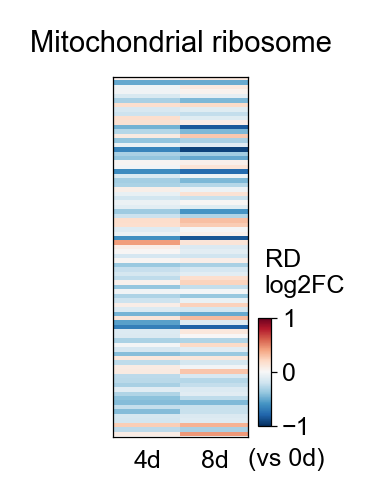

<Figure size 640x480 with 0 Axes>

In [35]:
sF = 1 # Size factor
wgap = 0.1
hgap = 0.1
nrow, ncol = 1, 1

width_ratios = [0.45]
height_ratios = [1.2]

fs_w = sum(np.array(width_ratios)*sF) + (ncol-1)*wgap*sF
fs_h = sum(np.array(height_ratios)*sF) + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w, fs_h ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    width_ratios=width_ratios,
                    height_ratios=height_ratios,
                    wspace=wgap/np.average(width_ratios), 
                    hspace=hgap/np.average(height_ratios),
                    left=0, right=1, bottom=0, top=1)

row = 0
col = 0
ax = fig.add_subplot(grid[row,col])

using_cm = copy.copy(cm.get_cmap("RdBu_r"))
using_cm.set_bad('#BBBBBB',1.)
heat = ax.imshow(RD.iloc[:,1:], 
                 cmap=using_cm, vmin=-1, vmax=1,
                 interpolation='none', aspect='auto', rasterized=True)
    
ax.set_xticks([0,1])
ax.set_yticks([])
ax.set_xticklabels(['4d','8d'], fontsize=6)
ax.tick_params(axis='x', length=0, pad=3)
ax.text(1.5, 83, '(vs 0d)', fontsize=6, ha='left', va='top', clip_on=False)

ax.set_title('Mitochondrial ribosome', fontsize=7)

cbar = plt.colorbar(heat, ax=ax, cax = ax.inset_axes([1.07, 0.03, 0.1, 0.3]), orientation='vertical')
cbar.ax.set_title('RD\nlog2FC', ha='left', fontsize=6)
cbar.ax.set_yticks([-1,0,1])
cbar.ax.tick_params(width=0.3, length=1.5, pad=1)

plt.savefig('mtRP_RDlogFC_heatmap.pdf', bbox_inches='tight')
plt.show()
plt.clf()